In [1]:
setwd('/import/oa/rawdata//scrna')

In [2]:
getwd()

[1] "/import/oa/rawdata/scrna"

In [3]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [4]:
dir='.' 
samples=list.files( dir ,pattern = '^GSM')
samples

[1] "GSM4419695_Day0" "GSM4419699_Day1" "GSM4419703_Day3"

In [18]:
library(rtracklayer)

In [19]:
gff <- readGFF("/import/reference//mmu//genome.gtf")
head(gff)

,seqid,source,type,start,end,score,strand,phase,gene_id,gene_version,...,transcript_name,transcript_source,transcript_biotype,tag,transcript_support_level,exon_number,exon_id,exon_version,protein_id,protein_version
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,havana,gene,3143476,3144545,NA,+,NA,ENSMUSG00000102693,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1,havana,transcript,3143476,3144545,NA,+,NA,ENSMUSG00000102693,2,...,4933401J01Rik-201,havana,TEC,basic,NA (assigned to previous version 1),NA,NA,NA,NA,NA
3,1,havana,exon,3143476,3144545,NA,+,NA,ENSMUSG00000102693,2,...,4933401J01Rik-201,havana,TEC,basic,NA (assigned to previous version 1),1,ENSMUSE00001343744,2,NA,NA
4,1,ensembl,gene,3172239,3172348,NA,+,NA,ENSMUSG00000064842,3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,ensembl,transcript,3172239,3172348,NA,+,NA,ENSMUSG00000064842,3,...,Gm26206-201,ensembl,snRNA,basic,NA (assigned to previous version 1),NA,NA,NA,NA,NA
6,1,ensembl,exon,3172239,3172348,NA,+,NA,ENSMUSG00000064842,3,...,Gm26206-201,ensembl,snRNA,basic,NA (assigned to previous version 1),1,ENSMUSE00000522066,2,NA,NA


In [20]:
mapid <- gff[gff$type == "gene", c("gene_id", "gene_name")]
head(mapid)

,gene_id,gene_name
,<chr>,<chr>
1,ENSMUSG00000102693,4933401J01Rik
4,ENSMUSG00000064842,Gm26206
7,ENSMUSG00000051951,Xkr4
25,ENSMUSG00000102851,Gm18956
28,ENSMUSG00000103377,Gm37180
31,ENSMUSG00000104017,Gm37363


In [27]:
colnames(list)

[1] "ENSEMBL" "SYMBOL"

In [28]:
colnames(mapid) = colnames(list)

In [21]:
dim(mapid)

[1] 53700     2

In [29]:
samples = 'GSM4419703_Day3'
folder=file.path(dir ,samples ) 
 sce=CreateSeuratObject(counts = Read10X(folder),
 project = samples )
immune.combined = sce
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 300 & nFeature_RNA < 5000 )
options(future.globals.maxSize = 1e9)
immune.combined
count = as.matrix(immune.combined@assays$RNA@counts)
# library(org.Mm.eg.db)
# k=keys(org.Mm.eg.db,keytype = "ENSEMBL")
# list=AnnotationDbi::select(org.Mm.eg.db,keys=k,columns = c("SYMBOL"), keytype="ENSEMBL")
library(dplyr)
ID_list=mapid[match(rownames(count),mapid[,"ENSEMBL"]),] %>%  na.omit()
head(ID_list,3)
count = count %>% as.data.frame() %>%   tibble::rownames_to_column(.,'ENSEMBL')
head(count,2)
expr = left_join(ID_list,count,by = 'ENSEMBL')
expr = expr[,2:dim(expr)[2]]
expr = expr[!duplicated(expr$SYMBOL),] %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'SYMBOL')
head(expr,2)
dim(expr)
day3=CreateSeuratObject(counts =expr)
day3@meta.data$orig.ident = 'Day3'

An object of class Seurat 
46078 features across 2214 samples within 1 assay 
Active assay: RNA (46078 features, 0 variable features)


Attaching package: 'dplyr'


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following object is masked from 'package:AnnotationDbi':

    select


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,ENSEMBL,SYMBOL
,<chr>,<chr>
1,ENSMUSG00000102693,4933401J01Rik
4,ENSMUSG00000064842,Gm26206
7,ENSMUSG00000051951,Xkr4


,ENSEMBL,AAACCTGAGAATGTTG-1,AAACCTGAGACGCACA-1,AAACCTGCACCAGATT-1,AAACCTGTCAACTCTT-1,AAACCTGTCACAAACC-1,AAACGGGAGGCCATAG-1,AAACGGGCAAGACACG-1,AAAGATGAGCTACCGC-1,AAAGATGCAACGATCT-1,...,TTTGGTTCATCGGACC-1,TTTGGTTGTTTGACAC-1,TTTGTCAAGAGAGCTC-1,TTTGTCAAGTAGGCCA-1,TTTGTCAAGTGGGCTA-1,TTTGTCACATGTCTCC-1,TTTGTCAGTGAGCGAT-1,TTTGTCATCATCGCTC-1,TTTGTCATCCCTTGCA-1,TTTGTCATCTTCTGGC-1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000102693,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000064842,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,AAACCTGAGAATGTTG-1,AAACCTGAGACGCACA-1,AAACCTGCACCAGATT-1,AAACCTGTCAACTCTT-1,AAACCTGTCACAAACC-1,AAACGGGAGGCCATAG-1,AAACGGGCAAGACACG-1,AAAGATGAGCTACCGC-1,AAAGATGCAACGATCT-1,AAAGATGCAGAGTGTG-1,...,TTTGGTTCATCGGACC-1,TTTGGTTGTTTGACAC-1,TTTGTCAAGAGAGCTC-1,TTTGTCAAGTAGGCCA-1,TTTGTCAAGTGGGCTA-1,TTTGTCACATGTCTCC-1,TTTGTCAGTGAGCGAT-1,TTTGTCATCATCGCTC-1,TTTGTCATCCCTTGCA-1,TTTGTCATCTTCTGGC-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4933401J01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm26206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1] 41851  2214

In [31]:
samples = 'GSM4419695_Day0'
folder=file.path(dir ,samples ) 
 sce=CreateSeuratObject(counts = Read10X(folder),
 project = samples )
immune.combined = sce
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 300 & nFeature_RNA < 5000 )
options(future.globals.maxSize = 1e9)
immune.combined
count = as.matrix(immune.combined@assays$RNA@counts)
# library(org.Mm.eg.db)
# k=keys(org.Mm.eg.db,keytype = "ENSEMBL")
# list=AnnotationDbi::select(org.Mm.eg.db,keys=k,columns = c("SYMBOL"), keytype="ENSEMBL")
library(dplyr)
ID_list=mapid[match(rownames(count),mapid[,"ENSEMBL"]),] %>%  na.omit()
head(ID_list,3)
count = count %>% as.data.frame() %>%   tibble::rownames_to_column(.,'ENSEMBL')
head(count,2)
expr = left_join(ID_list,count,by = 'ENSEMBL')
expr = expr[,2:dim(expr)[2]]
expr = expr[!duplicated(expr$SYMBOL),] %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'SYMBOL')
head(expr,2)


day0=CreateSeuratObject(counts =expr)
day0@meta.data$orig.ident = 'Day0'

An object of class Seurat 
46078 features across 2219 samples within 1 assay 
Active assay: RNA (46078 features, 0 variable features)

,ENSEMBL,SYMBOL
,<chr>,<chr>
1,ENSMUSG00000102693,4933401J01Rik
4,ENSMUSG00000064842,Gm26206
7,ENSMUSG00000051951,Xkr4


,ENSEMBL,AAACCTGAGATAGTCA-1,AAACCTGCAAACCTAC-1,AAACCTGCAAACTGCT-1,AAACCTGCAAAGCGGT-1,AAACCTGCAATGTTGC-1,AAACCTGGTCGTTGTA-1,AAACGGGAGCGATTCT-1,AAACGGGAGCTGCAAG-1,AAACGGGAGGAGTTGC-1,...,TTTGGTTAGGTACTCT-1,TTTGGTTAGTCCGTAT-1,TTTGGTTCAGTAGAGC-1,TTTGGTTGTACTTGAC-1,TTTGTCACAACAACCT-1,TTTGTCACAAGCCTAT-1,TTTGTCACACCAGATT-1,TTTGTCACATTTGCTT-1,TTTGTCAGTCAAAGAT-1,TTTGTCAGTCGAGATG-1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000102693,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000064842,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,AAACCTGAGATAGTCA-1,AAACCTGCAAACCTAC-1,AAACCTGCAAACTGCT-1,AAACCTGCAAAGCGGT-1,AAACCTGCAATGTTGC-1,AAACCTGGTCGTTGTA-1,AAACGGGAGCGATTCT-1,AAACGGGAGCTGCAAG-1,AAACGGGAGGAGTTGC-1,AAACGGGAGGGTGTGT-1,...,TTTGGTTAGGTACTCT-1,TTTGGTTAGTCCGTAT-1,TTTGGTTCAGTAGAGC-1,TTTGGTTGTACTTGAC-1,TTTGTCACAACAACCT-1,TTTGTCACAAGCCTAT-1,TTTGTCACACCAGATT-1,TTTGTCACATTTGCTT-1,TTTGTCAGTCAAAGAT-1,TTTGTCAGTCGAGATG-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4933401J01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm26206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
samples = 'GSM4419699_Day1'
folder=file.path(dir ,samples ) 
 sce=CreateSeuratObject(counts = Read10X(folder),
 project = samples )
immune.combined = sce
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 300 & nFeature_RNA < 5000 )
options(future.globals.maxSize = 1e9)
immune.combined
count = as.matrix(immune.combined@assays$RNA@counts)
# library(org.Mm.eg.db)
# k=keys(org.Mm.eg.db,keytype = "ENSEMBL")
# list=AnnotationDbi::select(org.Mm.eg.db,keys=k,columns = c("SYMBOL"), keytype="ENSEMBL")
library(dplyr)
ID_list=mapid[match(rownames(count),mapid[,"ENSEMBL"]),] %>%  na.omit()
head(ID_list,3)
count = count %>% as.data.frame() %>%   tibble::rownames_to_column(.,'ENSEMBL')
head(count,2)
expr = left_join(ID_list,count,by = 'ENSEMBL')
expr = expr[,2:dim(expr)[2]]
expr = expr[!duplicated(expr$SYMBOL),] %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'SYMBOL')
head(expr,2)

day1=CreateSeuratObject(counts =expr)
day1@meta.data$orig.ident = 'Day1'

An object of class Seurat 
46078 features across 3117 samples within 1 assay 
Active assay: RNA (46078 features, 0 variable features)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.1 GiB"


,ENSEMBL,SYMBOL
,<chr>,<chr>
1,ENSMUSG00000102693,4933401J01Rik
4,ENSMUSG00000064842,Gm26206
7,ENSMUSG00000051951,Xkr4


,ENSEMBL,AAACCTGAGGGCATGT-1,AAACCTGCACTAGTAC-1,AAACCTGCATACTCTT-1,AAACCTGGTGAGCGAT-1,AAACCTGTCGAGAACG-1,AAACCTGTCGTACGGC-1,AAACCTGTCTGACCTC-1,AAACGGGCACAGACAG-1,AAACGGGTCAACGCTA-1,...,TTTGTCAAGATGTTAG-1,TTTGTCAAGTACACCT-1,TTTGTCACAGGGATTG-1,TTTGTCAGTCGATTGT-1,TTTGTCAGTCTAGTGT-1,TTTGTCAGTGCAGGTA-1,TTTGTCAGTGCTTCTC-1,TTTGTCAGTTGATTGC-1,TTTGTCATCAACGCTA-1,TTTGTCATCCCAAGTA-1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000102693,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000064842,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,AAACCTGAGGGCATGT-1,AAACCTGCACTAGTAC-1,AAACCTGCATACTCTT-1,AAACCTGGTGAGCGAT-1,AAACCTGTCGAGAACG-1,AAACCTGTCGTACGGC-1,AAACCTGTCTGACCTC-1,AAACGGGCACAGACAG-1,AAACGGGTCAACGCTA-1,AAACGGGTCAAGCCTA-1,...,TTTGTCAAGATGTTAG-1,TTTGTCAAGTACACCT-1,TTTGTCACAGGGATTG-1,TTTGTCAGTCGATTGT-1,TTTGTCAGTCTAGTGT-1,TTTGTCAGTGCAGGTA-1,TTTGTCAGTGCTTCTC-1,TTTGTCAGTTGATTGC-1,TTTGTCATCAACGCTA-1,TTTGTCATCCCAAGTA-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4933401J01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm26206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
single.ob=merge(day0,merge(day1,day3))

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [34]:
immune.combined = single.ob

In [35]:
options(repr.plot.width = 14)

In [36]:
immune.combined[["percent.mt"]] <- PercentageFeatureSet(immune.combined,pattern = "^mt-")

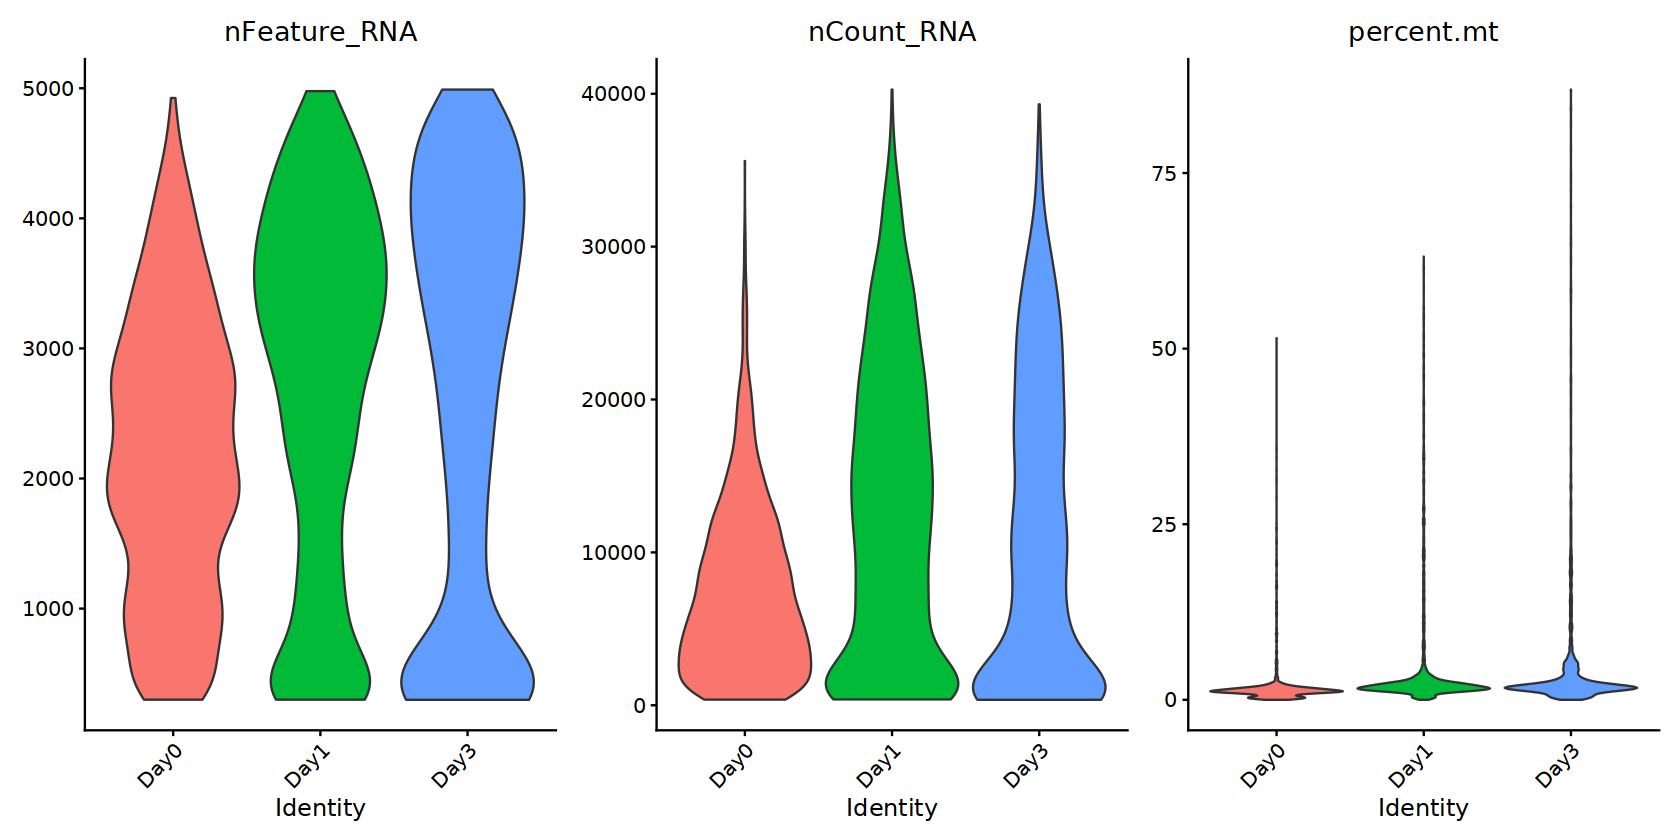

In [37]:
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")

In [38]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [39]:
ggsave('sc.figure1.pdf',height =  4,width = 9)

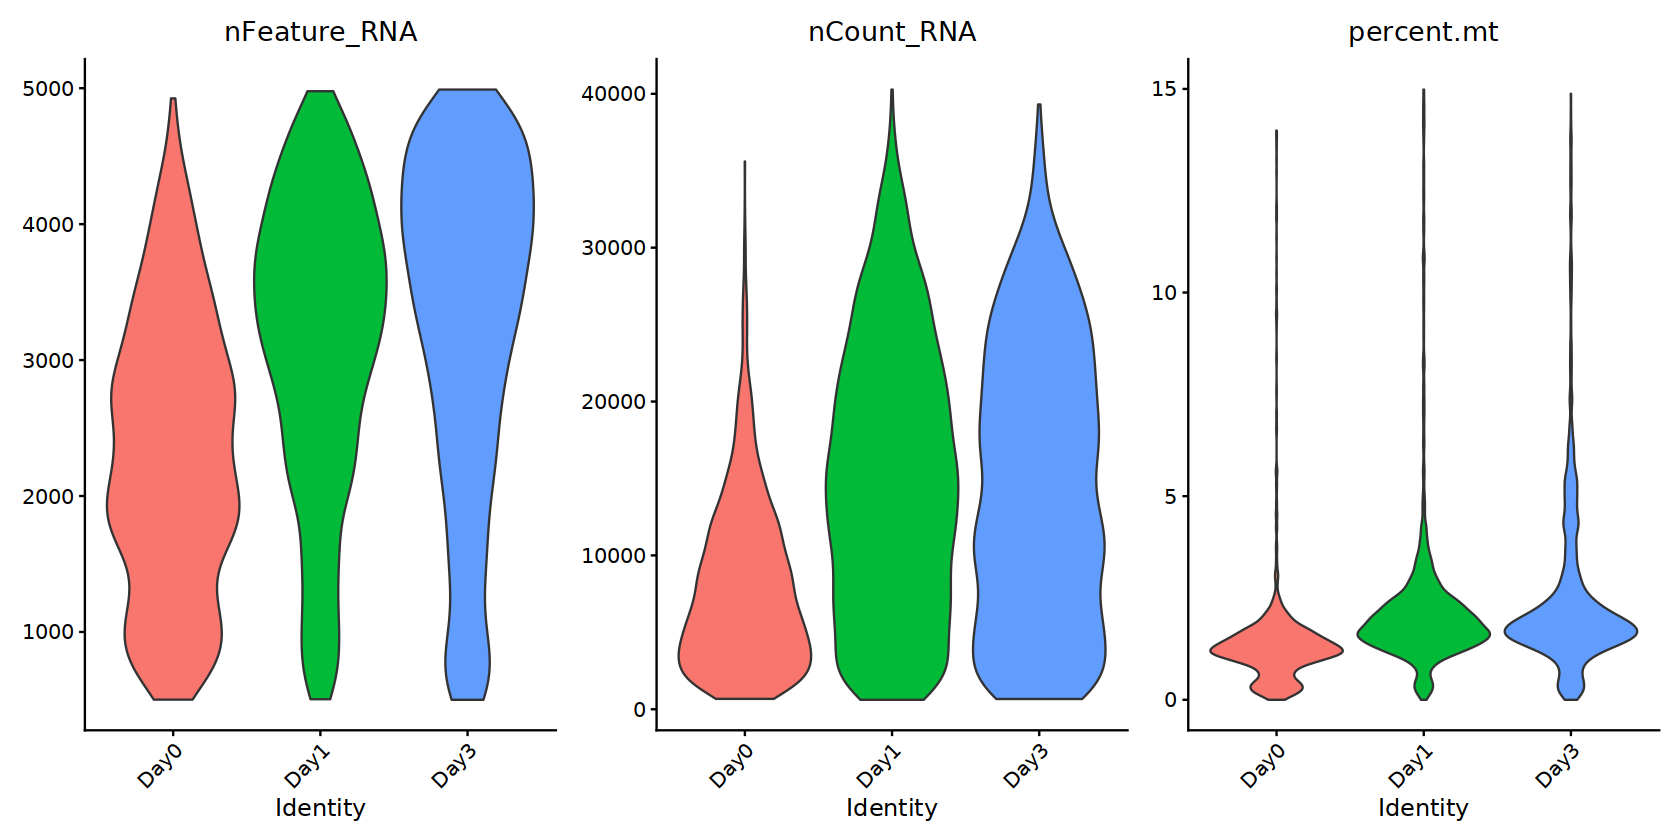

In [40]:
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.mt < 15)
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")
ggsave('sc.figure1-1.pdf',height =  4,width = 14)

In [41]:
table(immune.combined$orig.ident)


Day0 Day1 Day3 
2067 2625 1702 

### 去除双细胞

In [42]:
library(DoubletFinder)
library(tidyverse)
library(Seurat)
library(patchwork)

Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
v readr     2.1.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::%within%() masks IRanges::%within%()
x ggplot2::Position()   masks BiocGenerics::Position(), base::Pos

In [43]:
immune.combined <-NormalizeData(immune.combined)
immune.combined <- ScaleData(immune.combined,feature=rownames(immune.combined), verbose = FALSE)
immune.combined <- FindVariableFeatures(object = immune.combined,selection.method = 'vst', nfeatures = 2000)
immune.combined <- RunPCA(immune.combined,  features = VariableFeatures(object = immune.combined) ,verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- RunTSNE(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindClusters(immune.combined)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
06:09:26 UMAP embedding parameters a = 0.9922 b = 1.112

06:09:26 Read 6394 rows and found 20 numeric columns

06:09:26 Using Annoy for neighbor search, n_neighbors = 30

06:09:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:09:27 Writing NN index file to temp file /tmp/RtmpK4g4rZ/file18b539ade413

06:09:27 Searching Annoy index using 1 thread, search_k = 3000

06:09:29 Annoy recall = 100%

06:09:31 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6394
Number of edges: 211885

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8566
Number of communities: 16
Elapsed time: 1 seconds


In [44]:
H9 = immune.combined

In [45]:
paramSweep = function (seu, PCs = 1:20, sct = FALSE, num.cores = 1) 
{
    require(Seurat)
    require(fields)
    require(parallel)
    pK <- c(5e-04, 0.001, 0.005, seq(0.01, 0.3, by = 0.01))
    pN <- seq(0.05, 0.3, by = 0.05)
    min.cells <- round(nrow(seu@meta.data)/(1 - 0.05) - nrow(seu@meta.data))
    pK.test <- round(pK * min.cells)
    pK <- pK[which(pK.test >= 1)]
    orig.commands <- seu@commands
    if (nrow(seu@meta.data) > 10000) {
        real.cells <- rownames(seu@meta.data)[sample(1:nrow(seu@meta.data), 
            10000, replace = FALSE)]
        data <- seu@assays$RNA@counts[, real.cells]
        n.real.cells <- ncol(data)
    }
    if (nrow(seu@meta.data) <= 10000) {
        real.cells <- rownames(seu@meta.data)
        data <- seu@assays$RNA@counts
        n.real.cells <- ncol(data)
    }
    if (num.cores > 1) {
        require(parallel)
        cl <- makeCluster(num.cores)
        output2 <- mclapply(as.list(1:length(pN)), FUN = parallel_paramSweep, 
            n.real.cells, real.cells, pK, pN, data, orig.commands, 
            PCs, sct, mc.cores = num.cores)
        stopCluster(cl)
    }
    else {
        output2 <- lapply(as.list(1:length(pN)), FUN = parallel_paramSweep, 
            n.real.cells, real.cells, pK, pN, data, orig.commands, 
            PCs, sct)
    }
    sweep.res.list <- list()
    list.ind <- 0
    for (i in 1:length(output2)) {
        for (j in 1:length(output2[[i]])) {
            list.ind <- list.ind + 1
            sweep.res.list[[list.ind]] <- output2[[i]][[j]]
        }
    }
    name.vec <- NULL
    for (j in 1:length(pN)) {
        name.vec <- c(name.vec, paste("pN", pN[j], "pK", pK, 
            sep = "_"))
    }
    names(sweep.res.list) <- name.vec
    return(sweep.res.list)
}

In [46]:
sweep.res.list_kidney <- paramSweep(H9, PCs = 1:20, sct = FALSE)

Loading required package: fields

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: 'spam'


The following object is masked from 'package:stats4':

    mle


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.2.3"

Try help(fields) to get started.

Loading required package: parallel



[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Loading required package: KernSmooth

Warning message:
"package 'KernSmooth' was built under R version 4.2.3"
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR

Warning message:
"package 'ROCR' was built under R version 4.2.3"


NULL


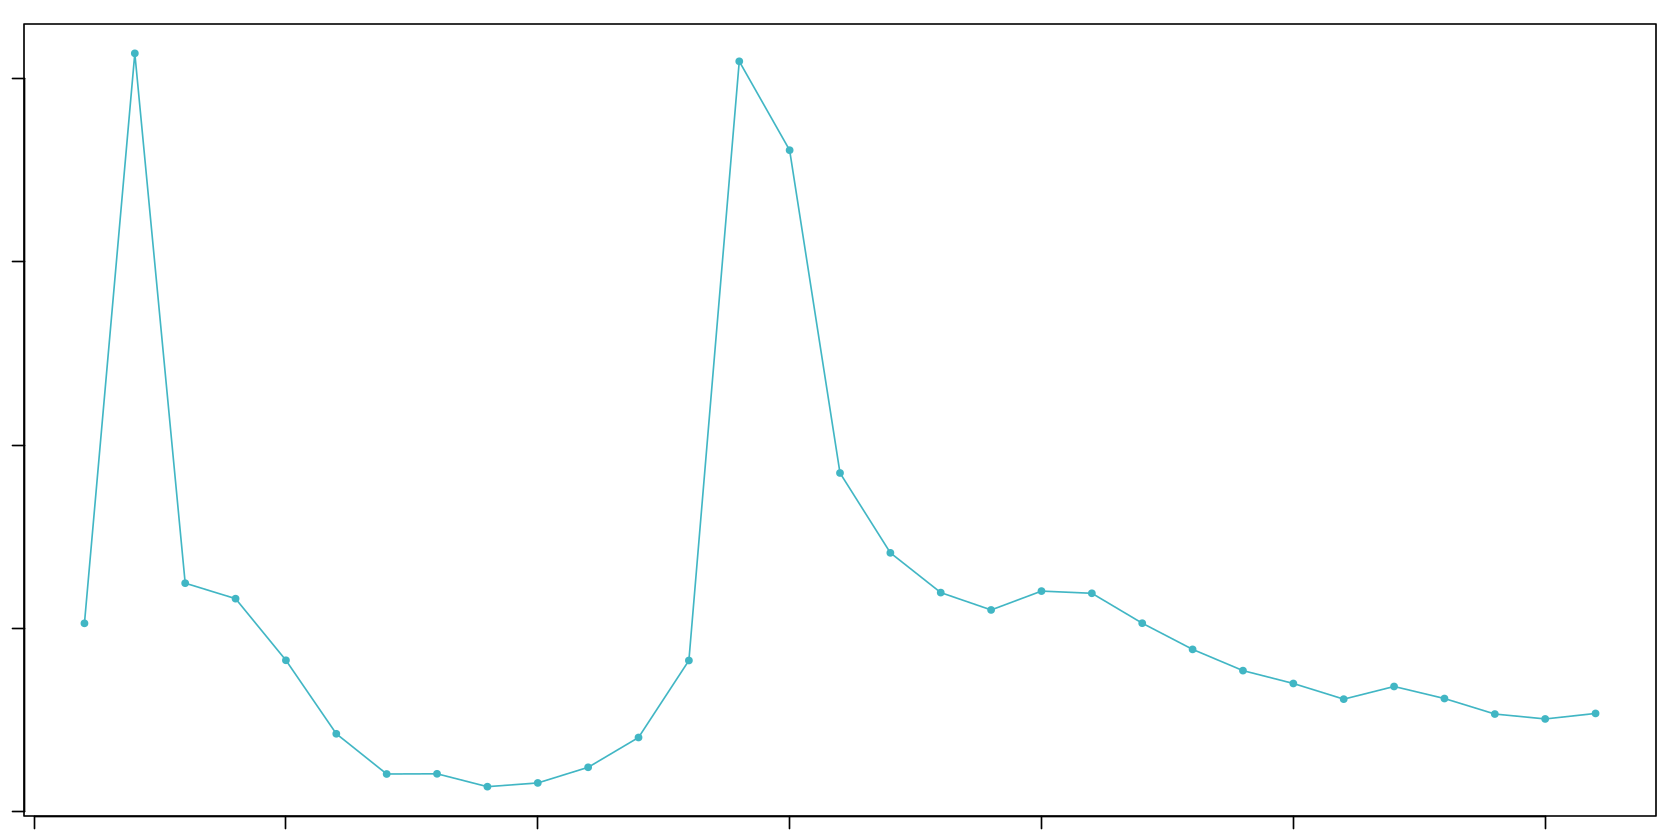

In [47]:
sweep.stats_kidney <- summarizeSweep(sweep.res.list_kidney, GT = FALSE)
bcmvn_kidney <- find.pK(sweep.stats_kidney)

In [48]:
pK_bcmvn <- bcmvn_kidney$pK[which.max(bcmvn_kidney$BCmetric)] %>% as.character() %>% as.numeric()

In [49]:
DoubletRate = ncol(H9)*8*1e-7

In [50]:
DoubletRate

[1] 0.0051152

In [51]:
homotypic.prop <- modelHomotypic(H9$orig.ident)

In [52]:
nExp_poi <- round(DoubletRate*ncol(H9)) 
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))

In [53]:
doubletFinder = function (seu, PCs, pN = 0.25, pK, nExp, reuse.pANN = FALSE, 
    sct = FALSE, annotations = NULL) 
{
    require(Seurat)
    require(fields)
    require(KernSmooth)
    if (reuse.pANN != FALSE) {
        pANN.old <- seu@meta.data[, reuse.pANN]
        classifications <- rep("Singlet", length(pANN.old))
        classifications[order(pANN.old, decreasing = TRUE)[1:nExp]] <- "Doublet"
        seu@meta.data[, paste("DF.classifications", pN, pK, nExp, 
            sep = "_")] <- classifications
        return(seu)
    }
    if (reuse.pANN == FALSE) {
        real.cells <- rownames(seu@meta.data)
        data <- seu@assays$RNA@counts[, real.cells]
        n_real.cells <- length(real.cells)
        n_doublets <- round(n_real.cells/(1 - pN) - n_real.cells)
        print(paste("Creating", n_doublets, "artificial doublets...", 
            sep = " "))
        real.cells1 <- sample(real.cells, n_doublets, replace = TRUE)
        real.cells2 <- sample(real.cells, n_doublets, replace = TRUE)
        doublets <- (data[, real.cells1] + data[, real.cells2])/2
        colnames(doublets) <- paste("X", 1:n_doublets, sep = "")
        data_wdoublets <- cbind(data, doublets)
        if (!is.null(annotations)) {
            stopifnot(typeof(annotations) == "character")
            stopifnot(length(annotations) == length(Cells(seu)))
            stopifnot(!any(is.na(annotations)))
            annotations <- factor(annotations)
            names(annotations) <- Cells(seu)
            doublet_types1 <- annotations[real.cells1]
            doublet_types2 <- annotations[real.cells2]
        }
        orig.commands <- seu@commands
        if (sct == FALSE) {
            print("Creating Seurat object...")
            seu_wdoublets <- CreateSeuratObject(counts = data_wdoublets)
            print("Normalizing Seurat object...")
            seu_wdoublets <- NormalizeData(seu_wdoublets, normalization.method = orig.commands$NormalizeData.RNA@params$normalization.method, 
                scale.factor = orig.commands$NormalizeData.RNA@params$scale.factor, 
                margin = orig.commands$NormalizeData.RNA@params$margin)
            print("Finding variable genes...")
            seu_wdoublets <- FindVariableFeatures(seu_wdoublets, 
                selection.method = orig.commands$FindVariableFeatures.RNA$selection.method, 
                loess.span = orig.commands$FindVariableFeatures.RNA$loess.span, 
                clip.max = orig.commands$FindVariableFeatures.RNA$clip.max, 
                mean.function = orig.commands$FindVariableFeatures.RNA$mean.function, 
                dispersion.function = orig.commands$FindVariableFeatures.RNA$dispersion.function, 
                num.bin = orig.commands$FindVariableFeatures.RNA$num.bin, 
                binning.method = orig.commands$FindVariableFeatures.RNA$binning.method, 
                nfeatures = orig.commands$FindVariableFeatures.RNA$nfeatures, 
                mean.cutoff = orig.commands$FindVariableFeatures.RNA$mean.cutoff, 
                dispersion.cutoff = orig.commands$FindVariableFeatures.RNA$dispersion.cutoff)
            print("Scaling data...")
            seu_wdoublets <- ScaleData(seu_wdoublets, features = orig.commands$ScaleData.RNA$features, 
                model.use = orig.commands$ScaleData.RNA$model.use, 
                do.scale = orig.commands$ScaleData.RNA$do.scale, 
                do.center = orig.commands$ScaleData.RNA$do.center, 
                scale.max = orig.commands$ScaleData.RNA$scale.max, 
                block.size = orig.commands$ScaleData.RNA$block.size, 
                min.cells.to.block = orig.commands$ScaleData.RNA$min.cells.to.block)
            print("Running PCA...")
            seu_wdoublets <- RunPCA(seu_wdoublets, features = orig.commands$ScaleData.RNA$features, 
                npcs = length(PCs), rev.pca = orig.commands$RunPCA.RNA$rev.pca, 
                weight.by.var = orig.commands$RunPCA.RNA$weight.by.var, 
                verbose = FALSE)
            pca.coord <- seu_wdoublets@reductions$pca@cell.embeddings[, 
                PCs]
            cell.names <- rownames(seu_wdoublets@meta.data)
            nCells <- length(cell.names)
            rm(seu_wdoublets)
            gc()
        }
        if (sct == TRUE) {
            require(sctransform)
            print("Creating Seurat object...")
            seu_wdoublets <- CreateSeuratObject(counts = data_wdoublets)
            print("Running SCTransform...")
            seu_wdoublets <- SCTransform(seu_wdoublets)
            print("Running PCA...")
            seu_wdoublets <- RunPCA(seu_wdoublets, npcs = length(PCs))
            pca.coord <- seu_wdoublets@reductions$pca@cell.embeddings[, 
                PCs]
            cell.names <- rownames(seu_wdoublets@meta.data)
            nCells <- length(cell.names)
            rm(seu_wdoublets)
            gc()
        }
        print("Calculating PC distance matrix...")
        dist.mat <- fields::rdist(pca.coord)
        print("Computing pANN...")
        pANN <- as.data.frame(matrix(0L, nrow = n_real.cells, 
            ncol = 1))
        if (!is.null(annotations)) {
            neighbor_types <- as.data.frame(matrix(0L, nrow = n_real.cells, 
                ncol = length(levels(doublet_types1))))
        }
        rownames(pANN) <- real.cells
        colnames(pANN) <- "pANN"
        k <- round(nCells * pK)
        for (i in 1:n_real.cells) {
            neighbors <- order(dist.mat[, i])
            neighbors <- neighbors[2:(k + 1)]
            pANN$pANN[i] <- length(which(neighbors > n_real.cells))/k
            if (!is.null(annotations)) {
                for (ct in unique(annotations)) {
                  neighbors_that_are_doublets = neighbors[neighbors > 
                    n_real.cells]
                  if (length(neighbors_that_are_doublets) > 0) {
                    neighbor_types[i, ] <- table(doublet_types1[neighbors_that_are_doublets - 
                      n_real.cells]) + table(doublet_types2[neighbors_that_are_doublets - 
                      n_real.cells])
                    neighbor_types[i, ] <- neighbor_types[i, 
                      ]/sum(neighbor_types[i, ])
                  }
                  else {
                    neighbor_types[i, ] <- NA
                  }
                }
            }
        }
        print("Classifying doublets..")
        classifications <- rep("Singlet", n_real.cells)
        classifications[order(pANN$pANN[1:n_real.cells], decreasing = TRUE)[1:nExp]] <- "Doublet"
        seu@meta.data[, paste("pANN", pN, pK, nExp, sep = "_")] <- pANN[rownames(seu@meta.data), 
            1]
        seu@meta.data[, paste("DF.classifications", pN, pK, nExp, 
            sep = "_")] <- classifications
        if (!is.null(annotations)) {
            colnames(neighbor_types) = levels(doublet_types1)
            for (ct in levels(doublet_types1)) {
                seu@meta.data[, paste("DF.doublet.contributors", 
                  pN, pK, nExp, ct, sep = "_")] <- neighbor_types[, 
                  ct]
            }
        }
        return(seu)
    }
}

In [54]:
scRNA <- doubletFinder(H9, PCs = 1:20, pN = 0.25, pK = pK_bcmvn, 
                          nExp = nExp_poi.adj, reuse.pANN = F, sct = F)

[1] "Creating 2131 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [55]:
colnames(scRNA@meta.data)

[1] "orig.ident"                      "nCount_RNA"                     
[3] "nFeature_RNA"                    "percent.mt"                     
[5] "RNA_snn_res.0.8"                 "seurat_clusters"                
[7] "pANN_0.25_0.01_22"               "DF.classifications_0.25_0.01_22"

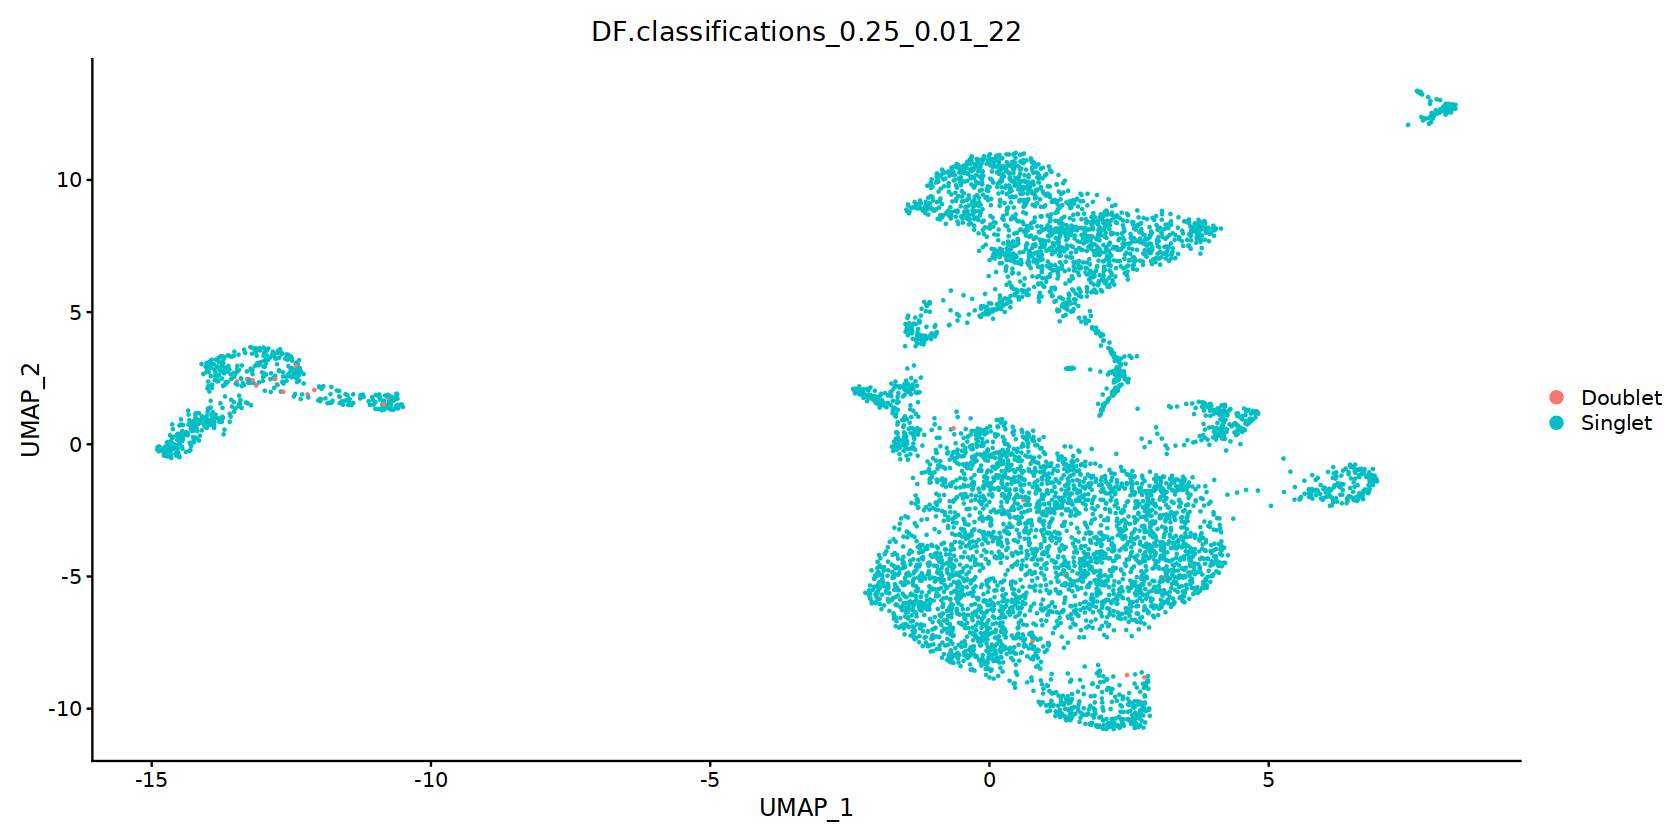

In [57]:
DimPlot(scRNA, reduction = "umap", group.by = "DF.classifications_0.25_0.01_22")

In [58]:
ggsave('sc.figure2.pdf',height =  4,width = 5)

In [59]:
immune.combined = subset(scRNA, subset = DF.classifications_0.25_0.01_22  != 'Doublet')

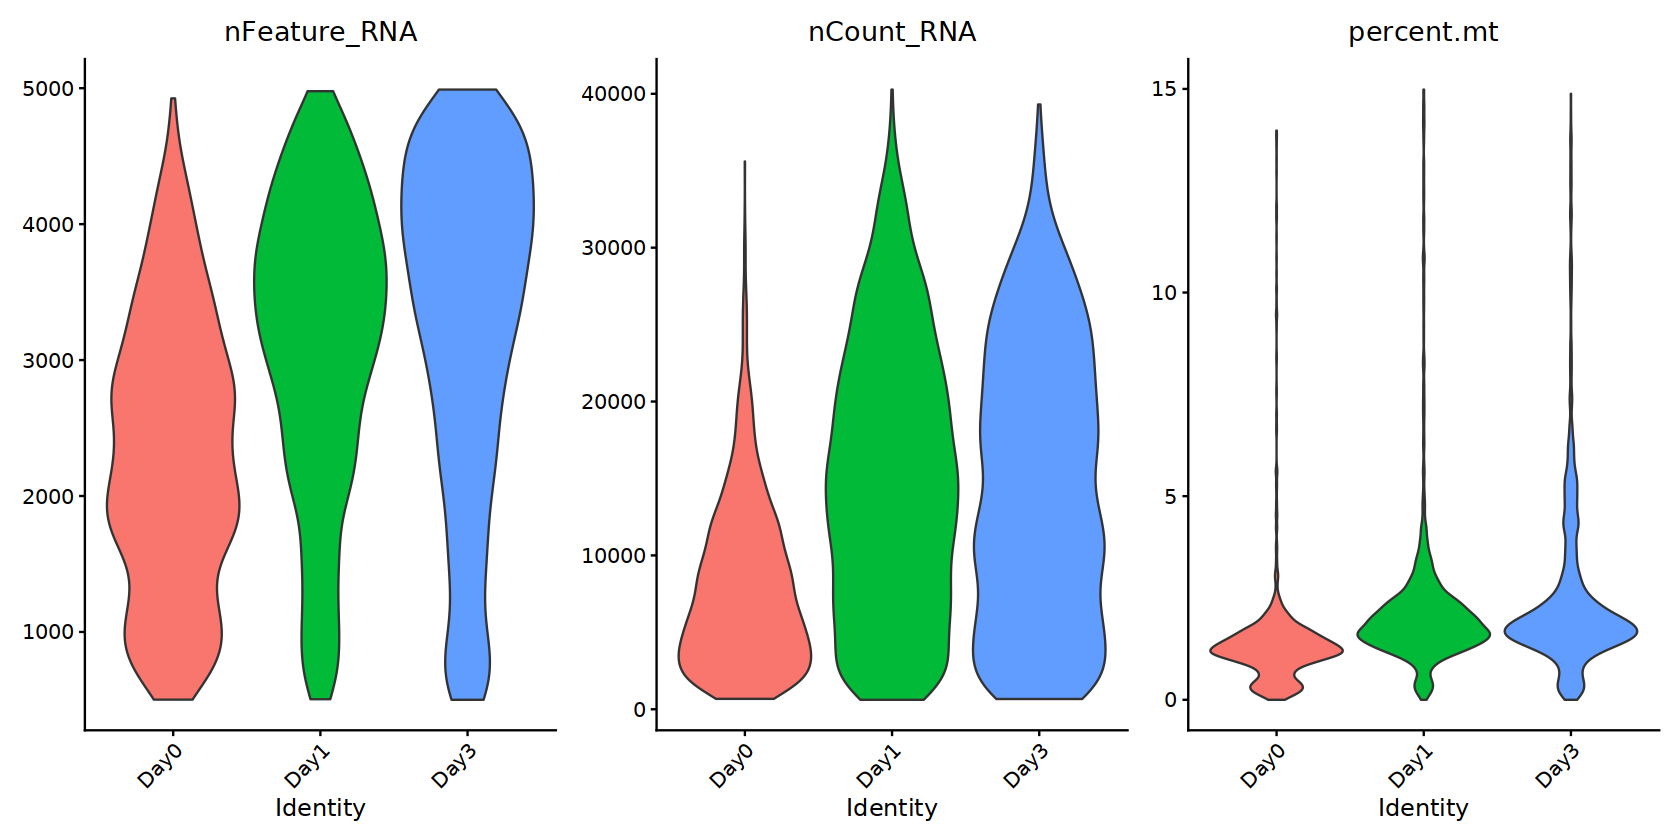

In [60]:
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.mt < 15)
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")
ggsave('sc.figure1-1.pdf',height =  4,width = 9)

In [61]:
table(immune.combined$orig.ident)


Day0 Day1 Day3 
2060 2616 1696 

In [62]:
# ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")

# testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
# testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)

# DefaultAssay(testAB.integrated) <- "integrated"
# # Run the standard workflow for visualization and clustering
# testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
# testAB.integrated <- RunPCA(testAB.integrated, npcs = 50, verbose = FALSE)
# testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:30)
# testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.5)
# testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:30)
# testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:30)

# immune.combined = testAB.integrated

In [94]:
scRNA <- FindClusters(scRNA,resolution = 0.4)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6394
Number of edges: 211885

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9006
Number of communities: 13
Elapsed time: 1 seconds


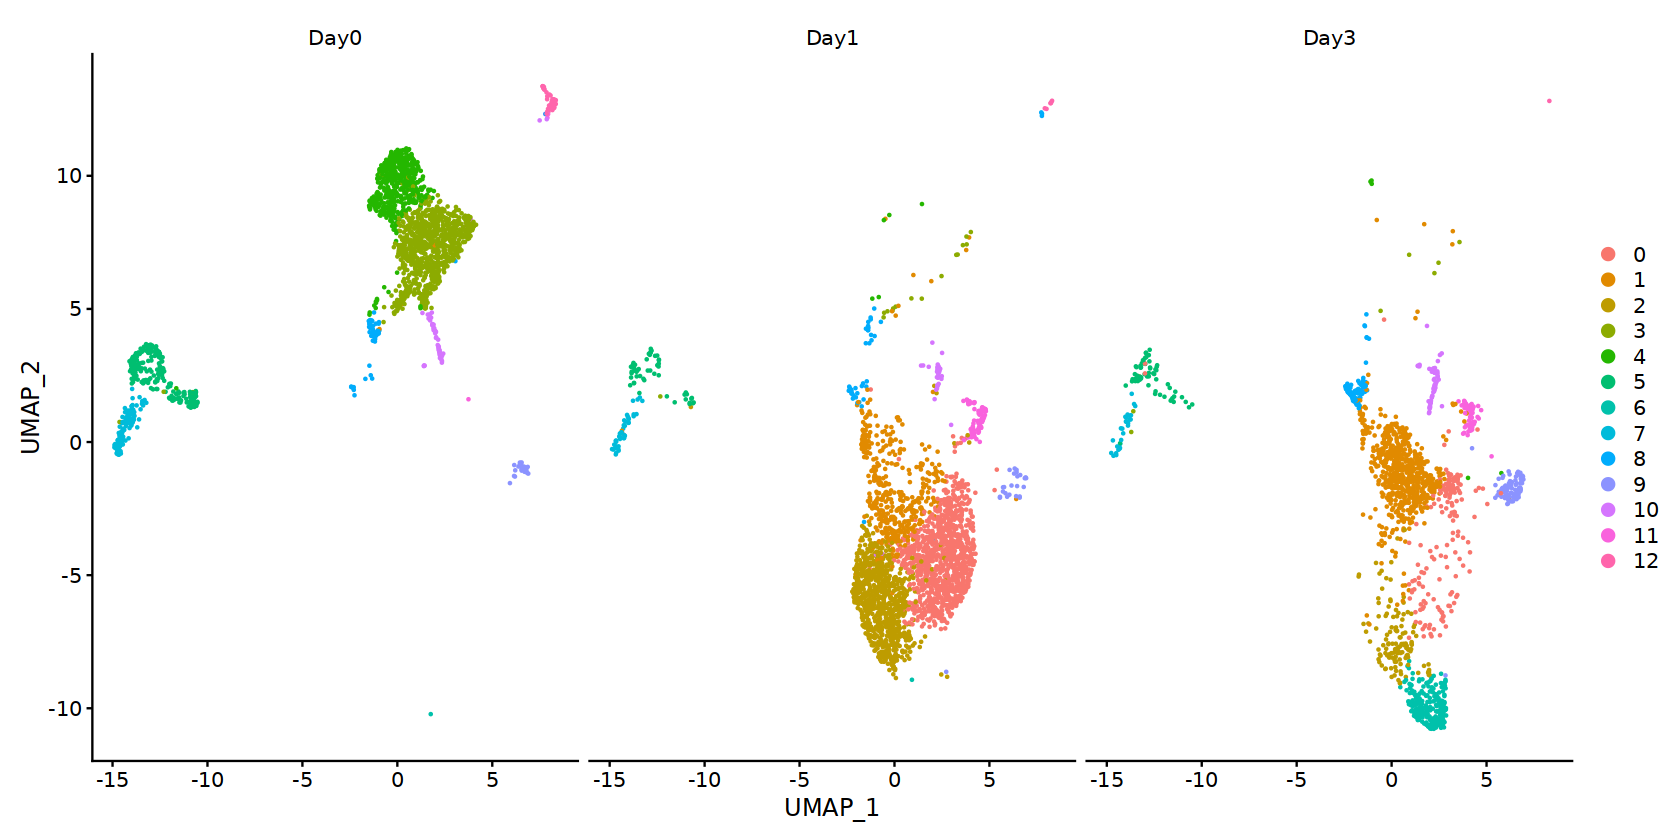

In [95]:
DimPlot(scRNA, reduction = "umap", split.by = "orig.ident")

In [96]:
saveRDS(scRNA,file = 'sc.before_rename.rds')

In [97]:
ggsave('sc.figure4.pdf',height =  8,width = 12)

In [98]:
SCE = scRNA

In [99]:
Idents(SCE) = 'seurat_clusters'
DefaultAssay(SCE) = 'RNA'
sce.markers <- FindAllMarkers(object = SCE, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12



In [100]:
write.csv(sce.markers,file = 'sce.markers.csv')

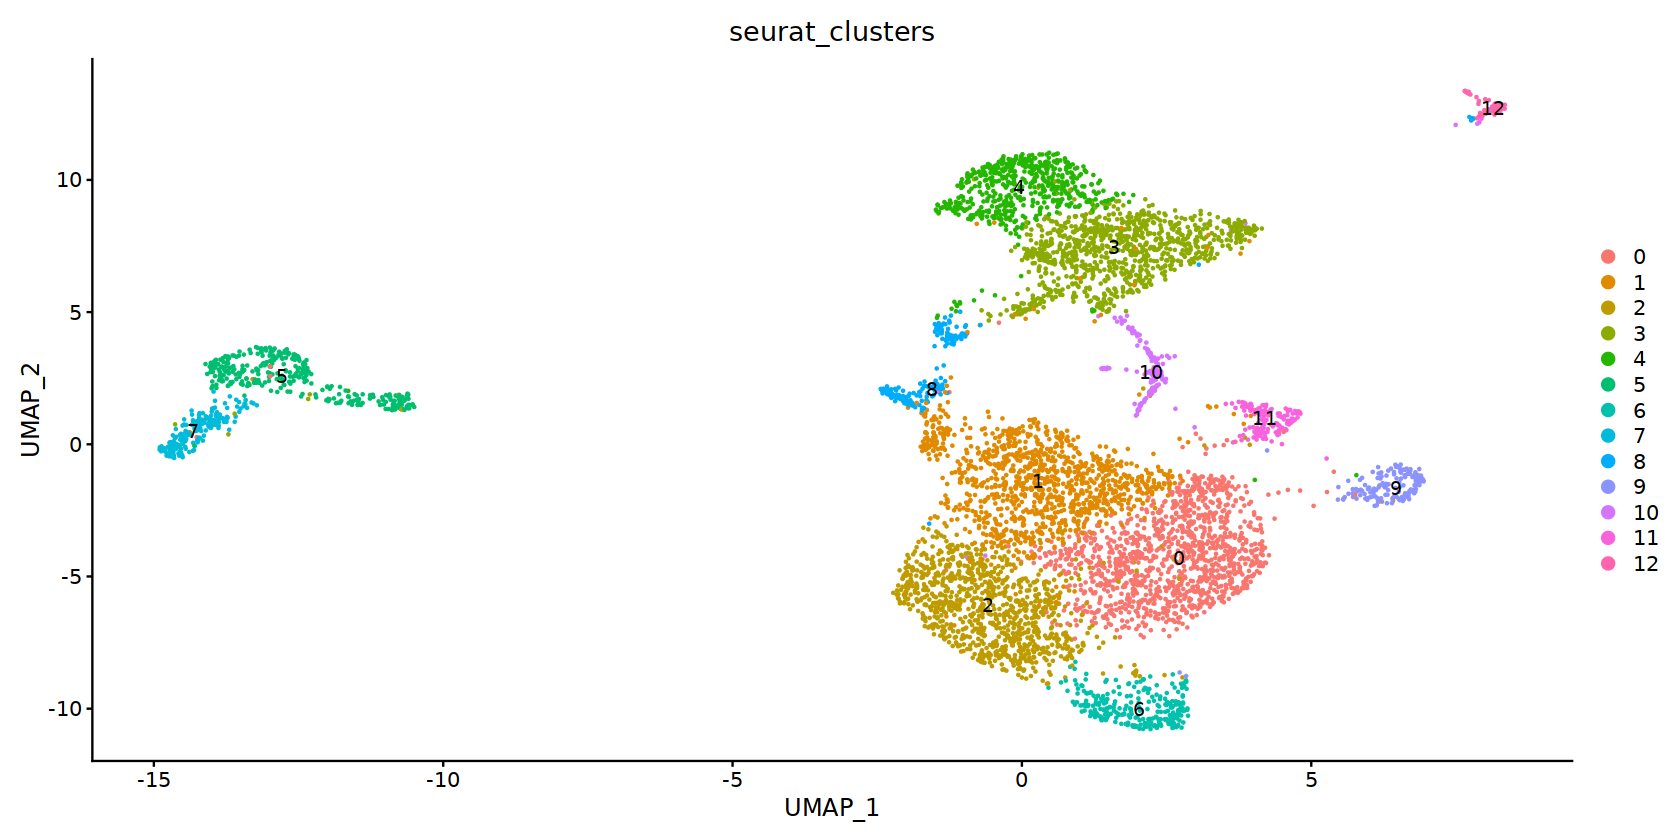

In [101]:
DimPlot(scRNA, reduction = "umap", group.by = "seurat_clusters",label =T)

In [ ]:
#  3 4  = Monocytic precursors
# 0 1 2   = Pre-osteoclasts
# 5 7  = neutrophils
# 6 Osteoclasts
# 12 Bcell
# 8 DC like precursors
# 10 unknown
# 9  VCAM mac
# 11 unknown

In [133]:
Idents(scRNA) = 'seurat_clusters'

In [134]:
scRNA = subset(scRNA,idents = c(0,1,2,3,4,5,6,7,8,9,12))

In [135]:
Idents(scRNA) = 'seurat_clusters'

In [136]:
celltype = data.frame(
    cluster = c(0,1,2,3,4,5,6,7,8,9,12),
    celltype = c('Pre_osteoclasts','Pre_osteoclasts','Pre_osteoclasts','Monocytic_precursors','Monocytic_precursors'
                ,'neutrophils','Osteoclasts','neutrophils','DC_like.precursors','VCAM_mac'
                ,'Bcell')
)

In [137]:
for(i in 1:nrow(celltype)){
  scRNA@meta.data[which(scRNA@meta.data$seurat_clusters == celltype$cluster[i]),'celltype'] <- celltype$celltype[i]}

In [139]:
scRNA$celltype = factor(scRNA$celltype,levels = unique(c('Pre_osteoclasts','Pre_osteoclasts','Pre_osteoclasts','Monocytic_precursors','Monocytic_precursors'
                ,'neutrophils','Osteoclasts','neutrophils','DC_like.precursors','VCAM_mac'
                ,'Bcell') ))


In [141]:
DefaultAssay(scRNA) = 'RNA'
Idents(scRNA) = 'celltype'
DefaultAssay(scRNA) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)

Calculating cluster Pre_osteoclasts

Calculating cluster Monocytic_precursors

Calculating cluster neutrophils

Calculating cluster Osteoclasts

Calculating cluster DC_like.precursors

Calculating cluster VCAM_mac

Calculating cluster Bcell



In [142]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)

[1] Monocytic_precursors neutrophils          Bcell               
[4] VCAM_mac             DC_like.precursors   Pre_osteoclasts     
[7] Osteoclasts         
7 Levels: Pre_osteoclasts Monocytic_precursors neutrophils ... Bcell

In [144]:
gene_cell_exp <- AverageExpression(scRNA,
                                   features = unique(top5$gene),
                                   group.by = 'celltype',
                                   slot = 'data') 
gene_cell_exp <- as.data.frame(gene_cell_exp$RNA)

In [145]:
gene_cell_exp = gene_cell_exp[,unique(c('Pre_osteoclasts','Pre_osteoclasts','Pre_osteoclasts','Monocytic_precursors','Monocytic_precursors'
                ,'neutrophils','Osteoclasts','neutrophils','DC_like.precursors','VCAM_mac'
                ,'Bcell') )]

In [147]:
library(ComplexHeatmap)
#顶部细胞类型注释
df <- data.frame(colnames(gene_cell_exp))
colnames(df) <- 'class'

In [148]:
df$class = factor(df$class,levels = unique(c('Pre_osteoclasts','Pre_osteoclasts','Pre_osteoclasts','Monocytic_precursors','Monocytic_precursors'
                ,'neutrophils','Osteoclasts','neutrophils','DC_like.precursors','VCAM_mac'
                ,'Bcell') ))

In [149]:
# mycol22 <- c("#b0d45d","#7fb961","#4c9568","#356d67","#42465c","#5066a1",
# "#76afda","#abddff","#dcf2ff","#fddbc8","#ffe788","#ffc556",
# "#e8743c","#f06152","#b20000","#eb998b","#a14462","#cca69c",
# "#9e6c69","#7d4444","#562e3c","#35212e")

In [150]:
unique(scRNA$celltype)

[1] Monocytic_precursors neutrophils          Bcell               
[4] VCAM_mac             DC_like.precursors   Pre_osteoclasts     
[7] Osteoclasts         
7 Levels: Pre_osteoclasts Monocytic_precursors neutrophils ... Bcell

In [151]:
top_anno = HeatmapAnnotation(df = df,#细胞名/cluster
                             border = T,
                             show_annotation_name = F,
                             gp = gpar(col = 'black'),
                             col = list(class = c('Monocytic_precursors' = '#A0CCFF','neutrophils'="#2F528F",
                                                  "Bcell"="#E3AD68",'VCAM_mac'='#e8743c','DC_like.precursors'='#f06152',
                                                  'Pre_osteoclasts'='#dcf2ff','Osteoclasts'='#356d67')))

In [152]:
#数据标准化缩放一下
marker_exp <- t(scale(t(gene_cell_exp),scale = T,center = T))

In [159]:
options(repr.plot.height = 9,repr.plot.width = 8)

In [160]:
p= Heatmap(marker_exp,
        cluster_rows = F,
        cluster_columns = F,
        show_column_names = F,
        show_row_names = T,
        column_title = NULL,
        heatmap_legend_param = list(
          title=' '),
        col = colorRampPalette(c("#0D72C3","white","#E35B10"))(100),
        border = 'black',
        rect_gp = gpar(col = "black", lwd = 1),
        row_names_gp = gpar(fontsize = 13),
        column_names_gp = gpar(fontsize = 13),
        top_annotation = top_anno)

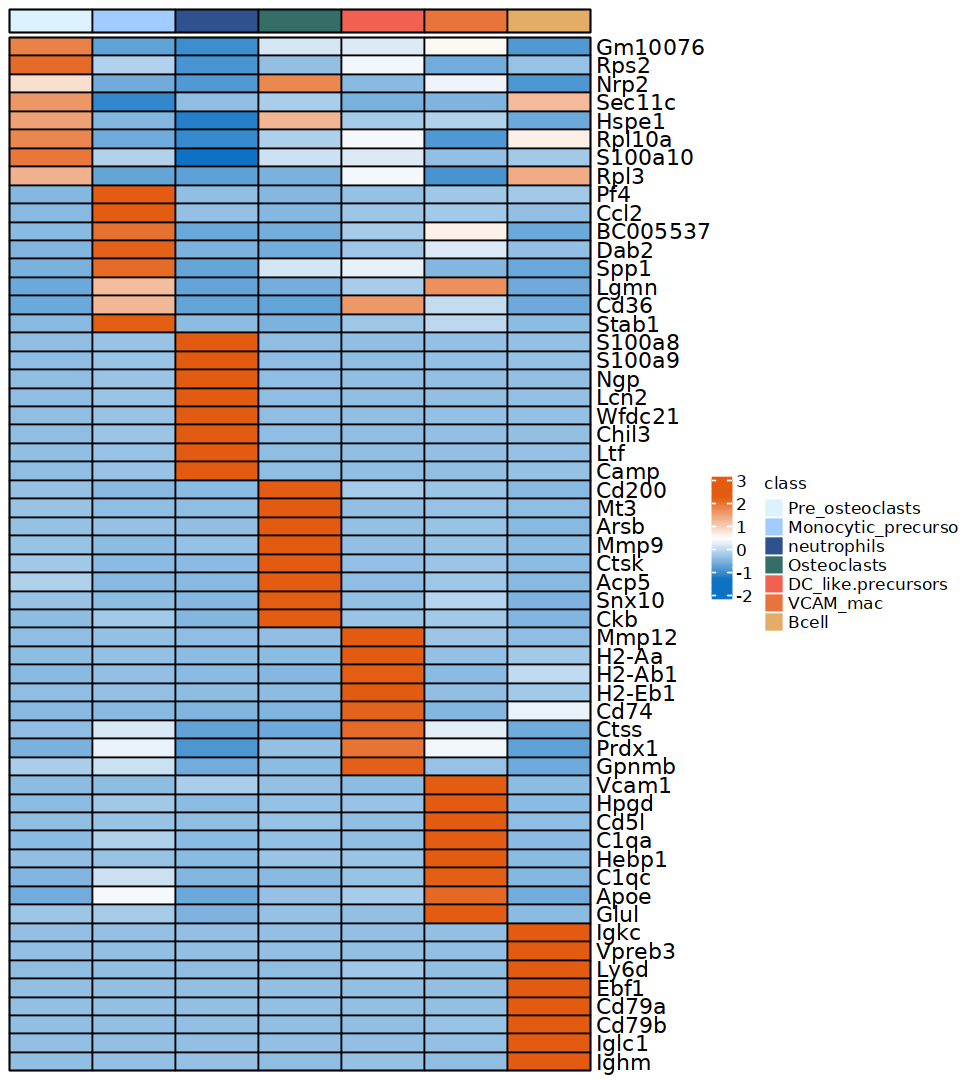

In [161]:
p

In [162]:
pdf('sc.heatmap1.pdf',height = 13,width = 10)
print(p)
dev.off()

png 
  2

In [163]:
table(scRNA$celltype)


     Pre_osteoclasts Monocytic_precursors          neutrophils 
                3316                 1524                  545 
         Osteoclasts   DC_like.precursors             VCAM_mac 
                 268                  197                  158 
               Bcell 
                  74 

In [164]:
saveRDS(scRNA,file = 'scRNA.anno.rds')

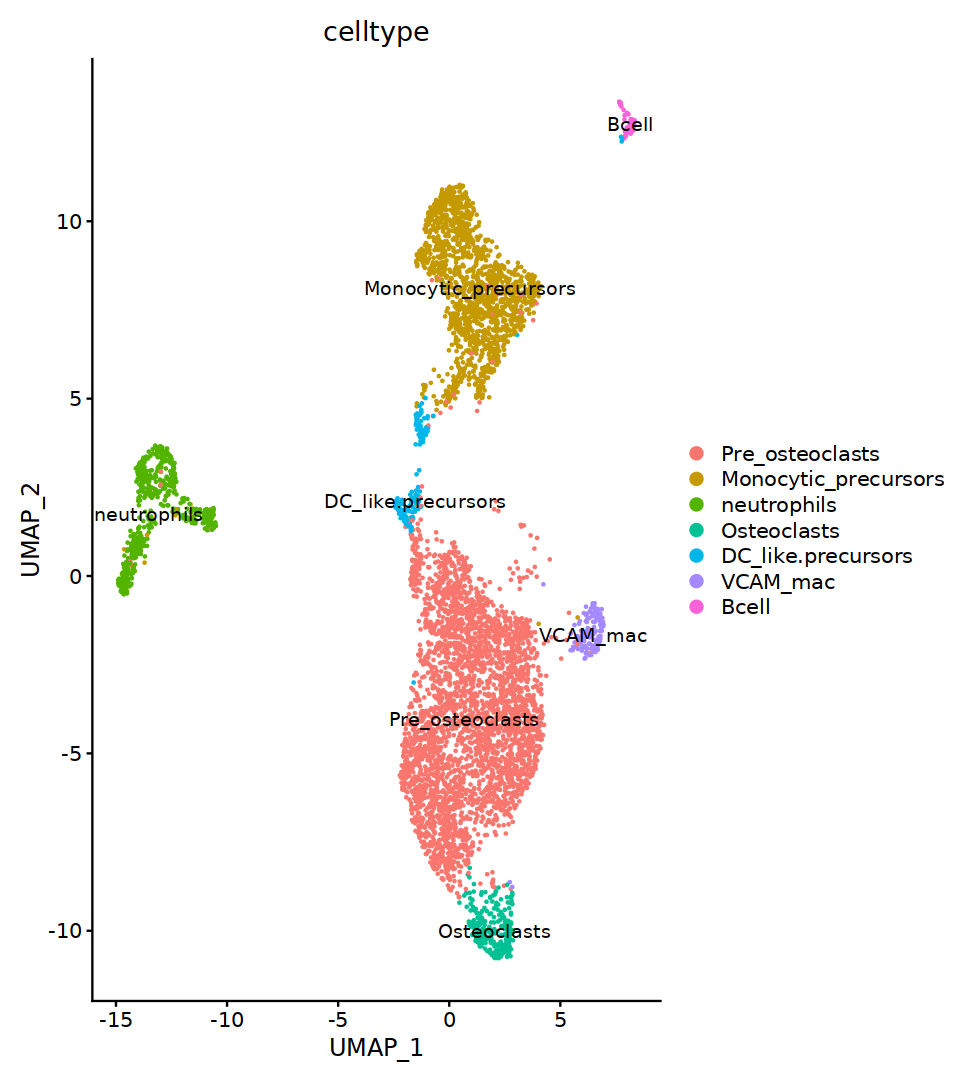

In [166]:
DimPlot(scRNA,group.by = 'celltype',label = T)

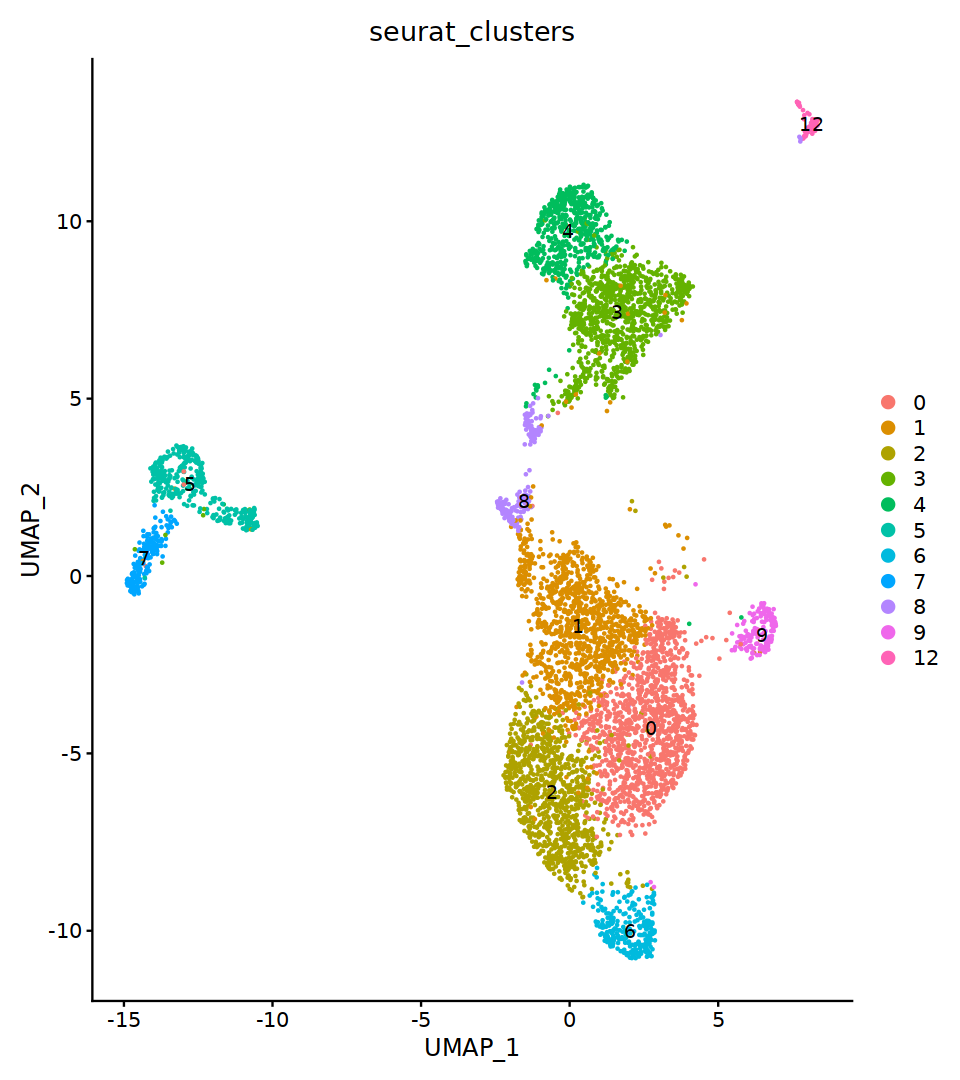

In [180]:
DimPlot(scRNA,group.by = 'seurat_clusters',label = T)

In [ ]:
# cluster4 = 2
# cluster7  =6 
# cluster2 - 0
# cluster3 = 1
# cluster9 = 8
# cluster1 = 3 

In [ ]:
# cluster7 vs cluster4;
# cluster4 vs cluster2;
# cluster2 vs cluster3;
# cluster3 vs cluster9;
# cluster9 vs cluster1;

In [5]:
scRNA = readRDS('./scRNA.anno.rds')

In [22]:
scRNA$seurat_clusters  = gsub('4','3' ,scRNA$seurat_clusters)

In [23]:
table(scRNA$seurat_clusters)


   0    1   12    2    3    5    6    7    8    9 
1204 1138   74  974 1524  340  268  205  197  158 

In [70]:
my = c('6-2' ,'2-0','0-1','1-8','8-3')
old = c('cluster7vscluster4','cluster4vscluster2','cluster2vscluster3',
        'cluster3vscluster9','cluster9vscluster1')

In [71]:
for (i in 1:5){
    library(pheatmap)
    library(enrichplot)
    library(clusterProfiler)
    library(org.Mm.eg.db)
    library(ggplot2)
    library(tidyr)
    Idents(scRNA) = 'seurat_clusters'
    markers =  FindMarkers(scRNA, ident.1= strsplit(my[i],'-')[[1]][1], ident.2= strsplit(my[i],'-')[[1]][2] ) 
    write.csv(markers,file =paste0(old[i], '.markers.csv'))
    gene = rownames(markers)
    gene_symbol <- bitr(geneID = gene,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Mm.eg.db")
    id <- gene_symbol[,2]
    x <- enrichGO(gene = id,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Mm.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.5,  
                   readable = TRUE) 
    res = x@result
    res <- res[order( res$p.adjust, decreasing = FALSE), ]
    res$Description <- factor(res$Description, levels = res$Description)
    
    CC = res %>%  filter(ONTOLOGY == 'CC')
    CC = CC[1:10,]
    MF = res %>%  filter(ONTOLOGY == 'MF')
    MF = MF[1:10,]
    BP = res %>%  filter(ONTOLOGY == 'BP')
    BP = BP[1:10,]
    res1 = rbind(CC,MF,BP)

    ggplot(res1, aes(Description, -log10(p.adjust))) +
    geom_col(aes(fill = ONTOLOGY), width = 0.5, show.legend = FALSE) +
    scale_fill_manual(values = c('#D06660', '#5AAD36', '#6C85F5')) +
    facet_grid(ONTOLOGY~., scale = 'free_y', space = 'free_y') +
    theme(panel.grid = element_blank(), panel.background = element_rect(color = 'black', fill = 'transparent')) +
    # ggtitle(paste0(deal,'_vs_',control)) +
    labs(x = '', y = '-Log10 P-Value\n') + scale_y_continuous(expand = expansion(mult = c(0, 0.1)))+
    coord_flip()+theme(text=element_text(size=15))
    write.csv(res,file = paste0(old[i],'.GO.res.csv'))
    ggsave(file = paste0(old[i],'.GO.plt.pdf'),width = 7,height = 8)

    ek <- enrichKEGG(gene =id , 
               organism = "mmu",  
               pvalueCutoff =0.1, 
               qvalueCutoff = 0.1) 

    ek@result = ek@result %>% separate(Description, c('Description', ' col2 '),sep = '- ')
    options(repr.plot.height = 7,repr.plot.width = 8)
    keggres = ek@result
    enrichplot::dotplot(ek,  
        x = "GeneRatio", 
        color = "p.adjust", 
        showCategory = 20, 
        size = 'Count', 
        title = "KEGG_enrichment_dotplot"  ,label_format = 100
        )
    write.csv(keggres,file = paste0(old[i],'.KEGG.res.csv'))
    ggsave(file = paste0(old[i],'.kegg.plt.pdf'),width = 8,height = 7)
}

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = gene, fromType = "SYMBOL", toType = c("ENTREZID"), :
"1.46% of input gene IDs are fail to map..."
Warning message:
"Expected 2 pieces. Additional pieces discarded in 21 rows [6, 12, 14, 25, 33,
67, 68, 107, 130, 182, 226, 227, 233, 258, 259, 271, 280, 290, 305, 322, ...]."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = gene, fromType = "SYMBOL", toType = c("ENTREZID"), :
"0.52% of input gene IDs are fail to map..."
Warning message:
"Expected 2 pieces. Additional pieces discarded in 14 rows [7, 22, 52, 75, 78,
90, 95, 116, 120, 129, 157, 158, 205, 257]."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = gene, fromType = "SYMBOL", toType = c("ENTREZID"), :
"0.91% of input gene IDs are fail to map..."
Warning message:
"Expected 2 pieces. Additional pieces discarded in 16 rows [8, 24, 85, 90, 93,
116, 121, 124, 134, 